In [1]:
from tqdm.auto import tqdm
import torch
from torch.utils.data import DataLoader

from dataset import train_test_split, LesionDataset
from models.vanilla_vae import VanillaVAE

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
train, valid, test = train_test_split(seed=0)

train_loader = DataLoader(LesionDataset(train), batch_size=32, num_workers=2)
valid_loader = DataLoader(LesionDataset(valid), batch_size=32, num_workers=2)
test_loader = DataLoader(LesionDataset(test), batch_size=32, num_workers=2)

In [4]:
model = VanillaVAE(1, 32)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

#### Train

In [5]:
train_log = []
for epoch in tqdm(range(0, 10)):
    for idx, (images, bbox, _) in enumerate(train_loader):
        recon_images, mu, logvar = model(images.to(device))
        loss, recons_loss, kld = model.loss_fn(recon_images, images.to(device), mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_log.append((loss, recons_loss, kld))

In [21]:
import numpy as np

In [25]:
np.squeeze(images[0])

tensor([[ 8.6593,  9.9670, 10.4029,  ..., 19.4322, 19.1831, 19.4322],
        [ 9.0330, 10.4029, 10.7766,  ..., 18.4982, 18.1245, 18.8095],
        [ 9.5934, 10.3407,  9.7802,  ..., 18.9963, 18.6227, 18.9963],
        ...,
        [15.3223, 15.1355, 16.0696,  ..., 15.8205, 16.2564, 16.8791],
        [14.2637, 14.4505, 15.4469,  ..., 15.6960, 16.1319, 16.5678],
        [14.3883, 14.8242, 14.7619,  ..., 16.0696, 15.6960, 15.5714]])

In [27]:
row_idx, col_idx = np.where(np.squeeze(images[0])<0)

In [28]:
np.squeeze(images[0])[row_idx, col_idx]

tensor([ -1.8022,  -5.7875,  -3.8571,  -4.7912, -10.8938, -18.3663, -18.3040,
        -10.4579,  -5.3516, -10.5824, -20.1722, -30.7582, -34.7436, -24.5934,
         -6.7216,  -7.0952, -13.3846, -20.2967, -32.8132, -43.2125, -41.5934,
        -28.7033,  -8.2784,  -5.6630, -16.9341, -23.0366, -31.4432, -39.6630,
        -41.3443, -36.9853, -24.4066,  -9.9597, -20.0476, -26.1502, -32.0659,
        -32.6264, -30.1978, -21.9158,  -1.9890,  -4.2930, -14.3187, -16.7473,
        -13.5092, -11.3297,  -4.4176])

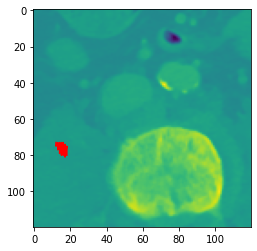

In [31]:
plt.imshow(np.squeeze(images[0]))
plt.plot(row_idx, col_idx, color='r')

In [16]:
images.shape

torch.Size([32, 1, 120, 120])

In [15]:
(images<0).sum()

tensor(126975)

In [10]:
recon_images>0

RuntimeError: CUDA error: device-side assert triggered

In [9]:
recon_images = recon_images.cpu().numpy()

RuntimeError: CUDA error: device-side assert triggered

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_log)), [i[0] for i in train_log], label='loss')
plt.plot(range(len(train_log)), [i[1] for i in train_log], label='recons loss', color='k')
plt.plot(range(len(train_log)), [i[2] for i in train_log], label='KL Div', color='r')
plt.legend()